In [11]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from pydmd import DMD, BOPDMD
from pydmd.plotter import plot_eigs, plot_summary
from pydmd.preprocessing import hankel_preprocessing

In [12]:
def f1(x, t):
    return 1.0 / np.cosh(x + 3) * np.cos(2.3 * t)


def f2(x, t):
    return 2.0 / np.cosh(x) * np.tanh(x) * np.sin(2.8 * t)


nx = 65  # number of grid points along space dimension
nt = 129  # number of grid points along time dimension

# Define the space and time grid for data collection.
x = np.linspace(-5, 5, nx)
t = np.linspace(0, 4 * np.pi, nt)
xgrid, tgrid = np.meshgrid(x, t)
dt = t[1] - t[0]  # time step between each snapshot

# Data consists of 2 spatiotemporal signals.
X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2

# Make a version of the data with noise.
mean = 0
std_dev = 0.2
random_matrix = np.random.normal(mean, std_dev, size=(nt, nx))
Xn = X + random_matrix

X.shape

(129, 65)

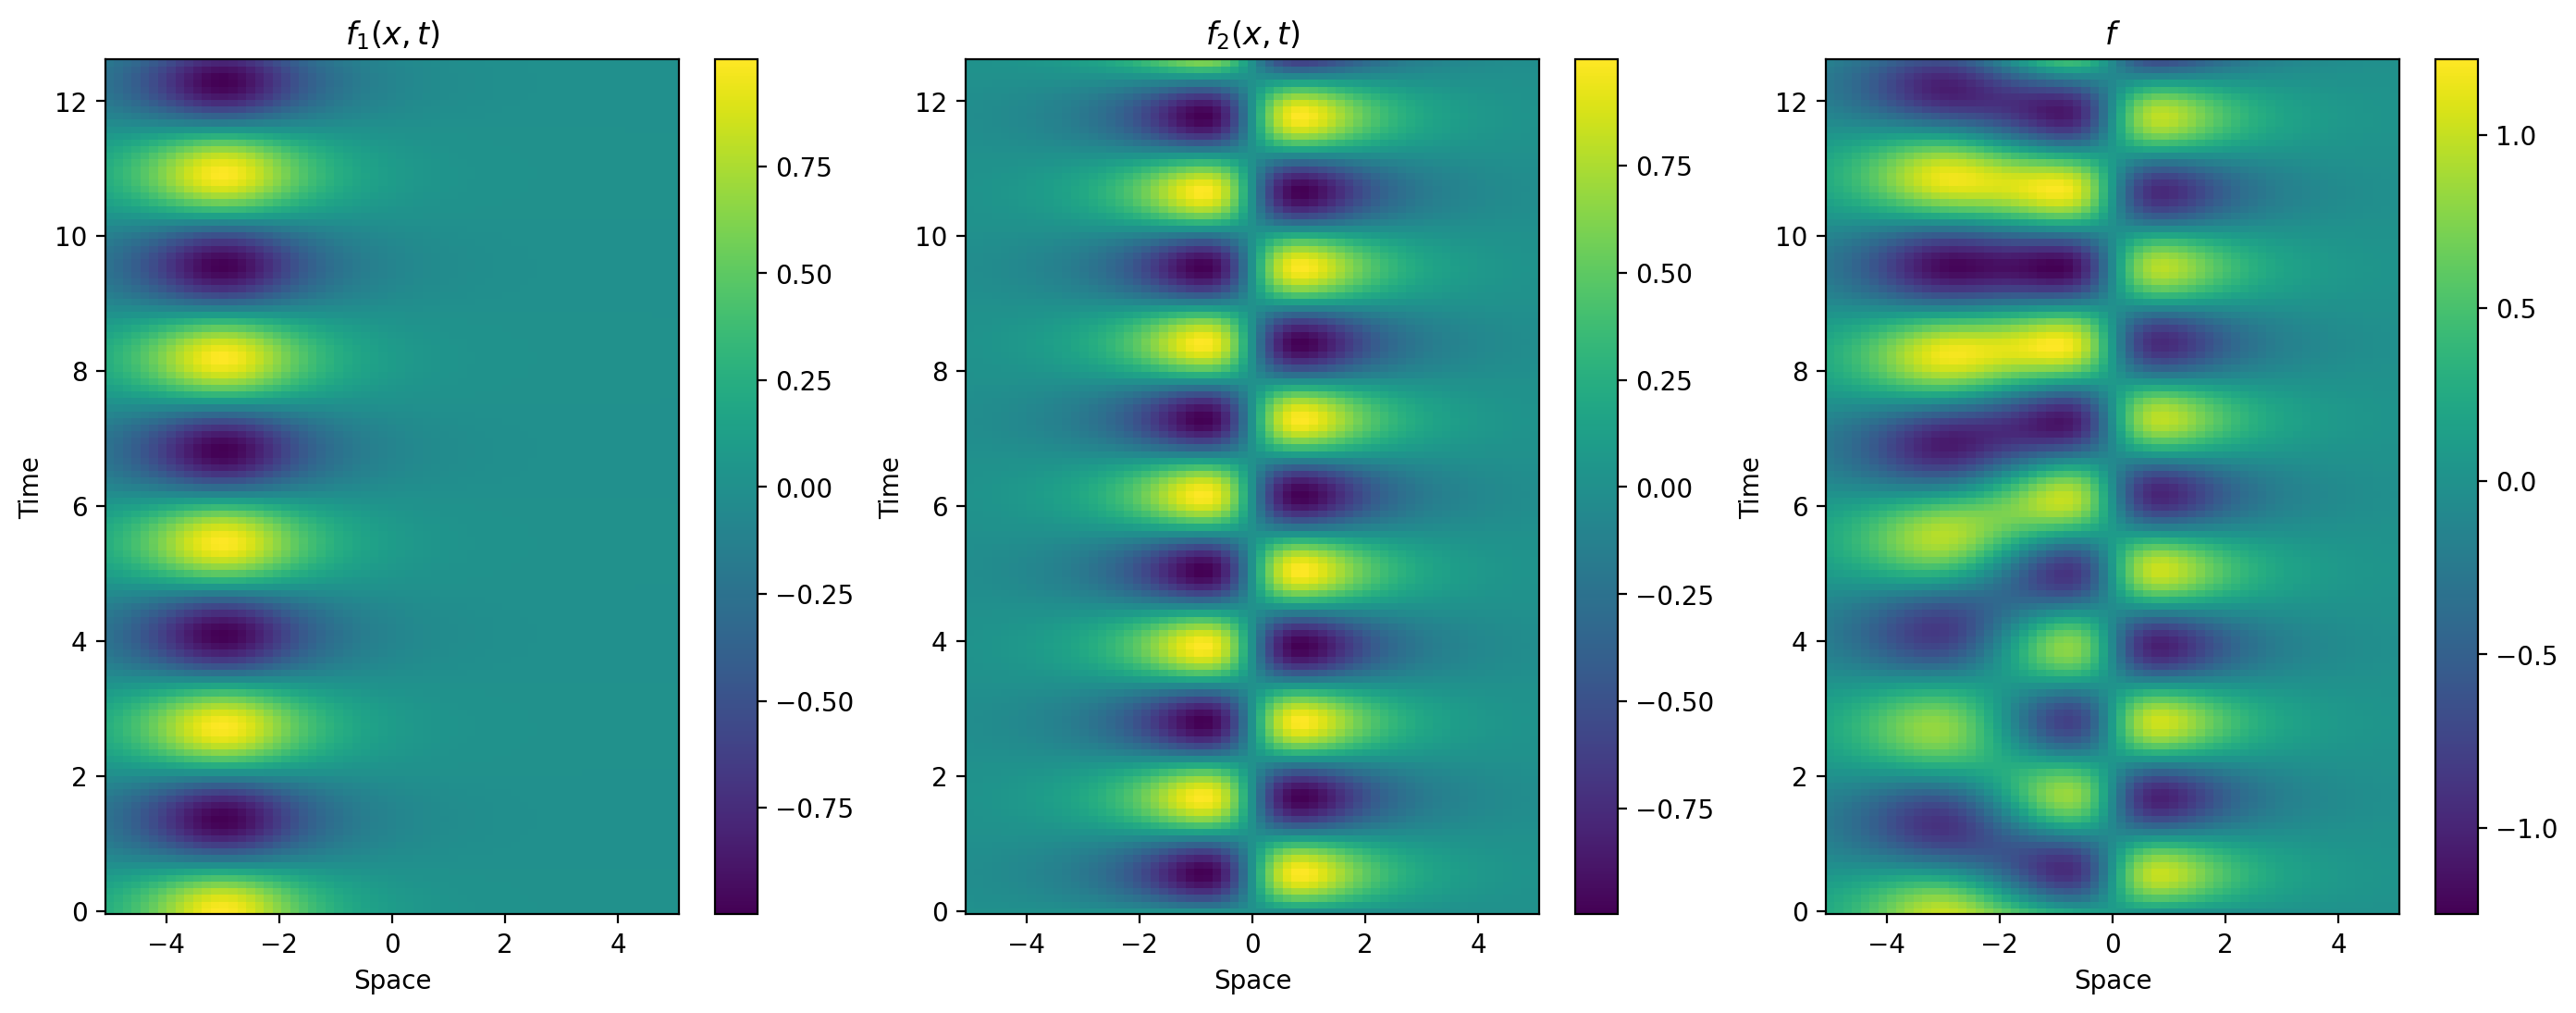

In [13]:
titles = ["$f_1(x,t)$", "$f_2(x,t)$", "$f$"]
data = [X1, X2, X]

fig = plt.figure(figsize=(17, 6), dpi=200)
for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
    plt.xlabel("Space")
    plt.ylabel("Time")
    plt.colorbar()
plt.show()

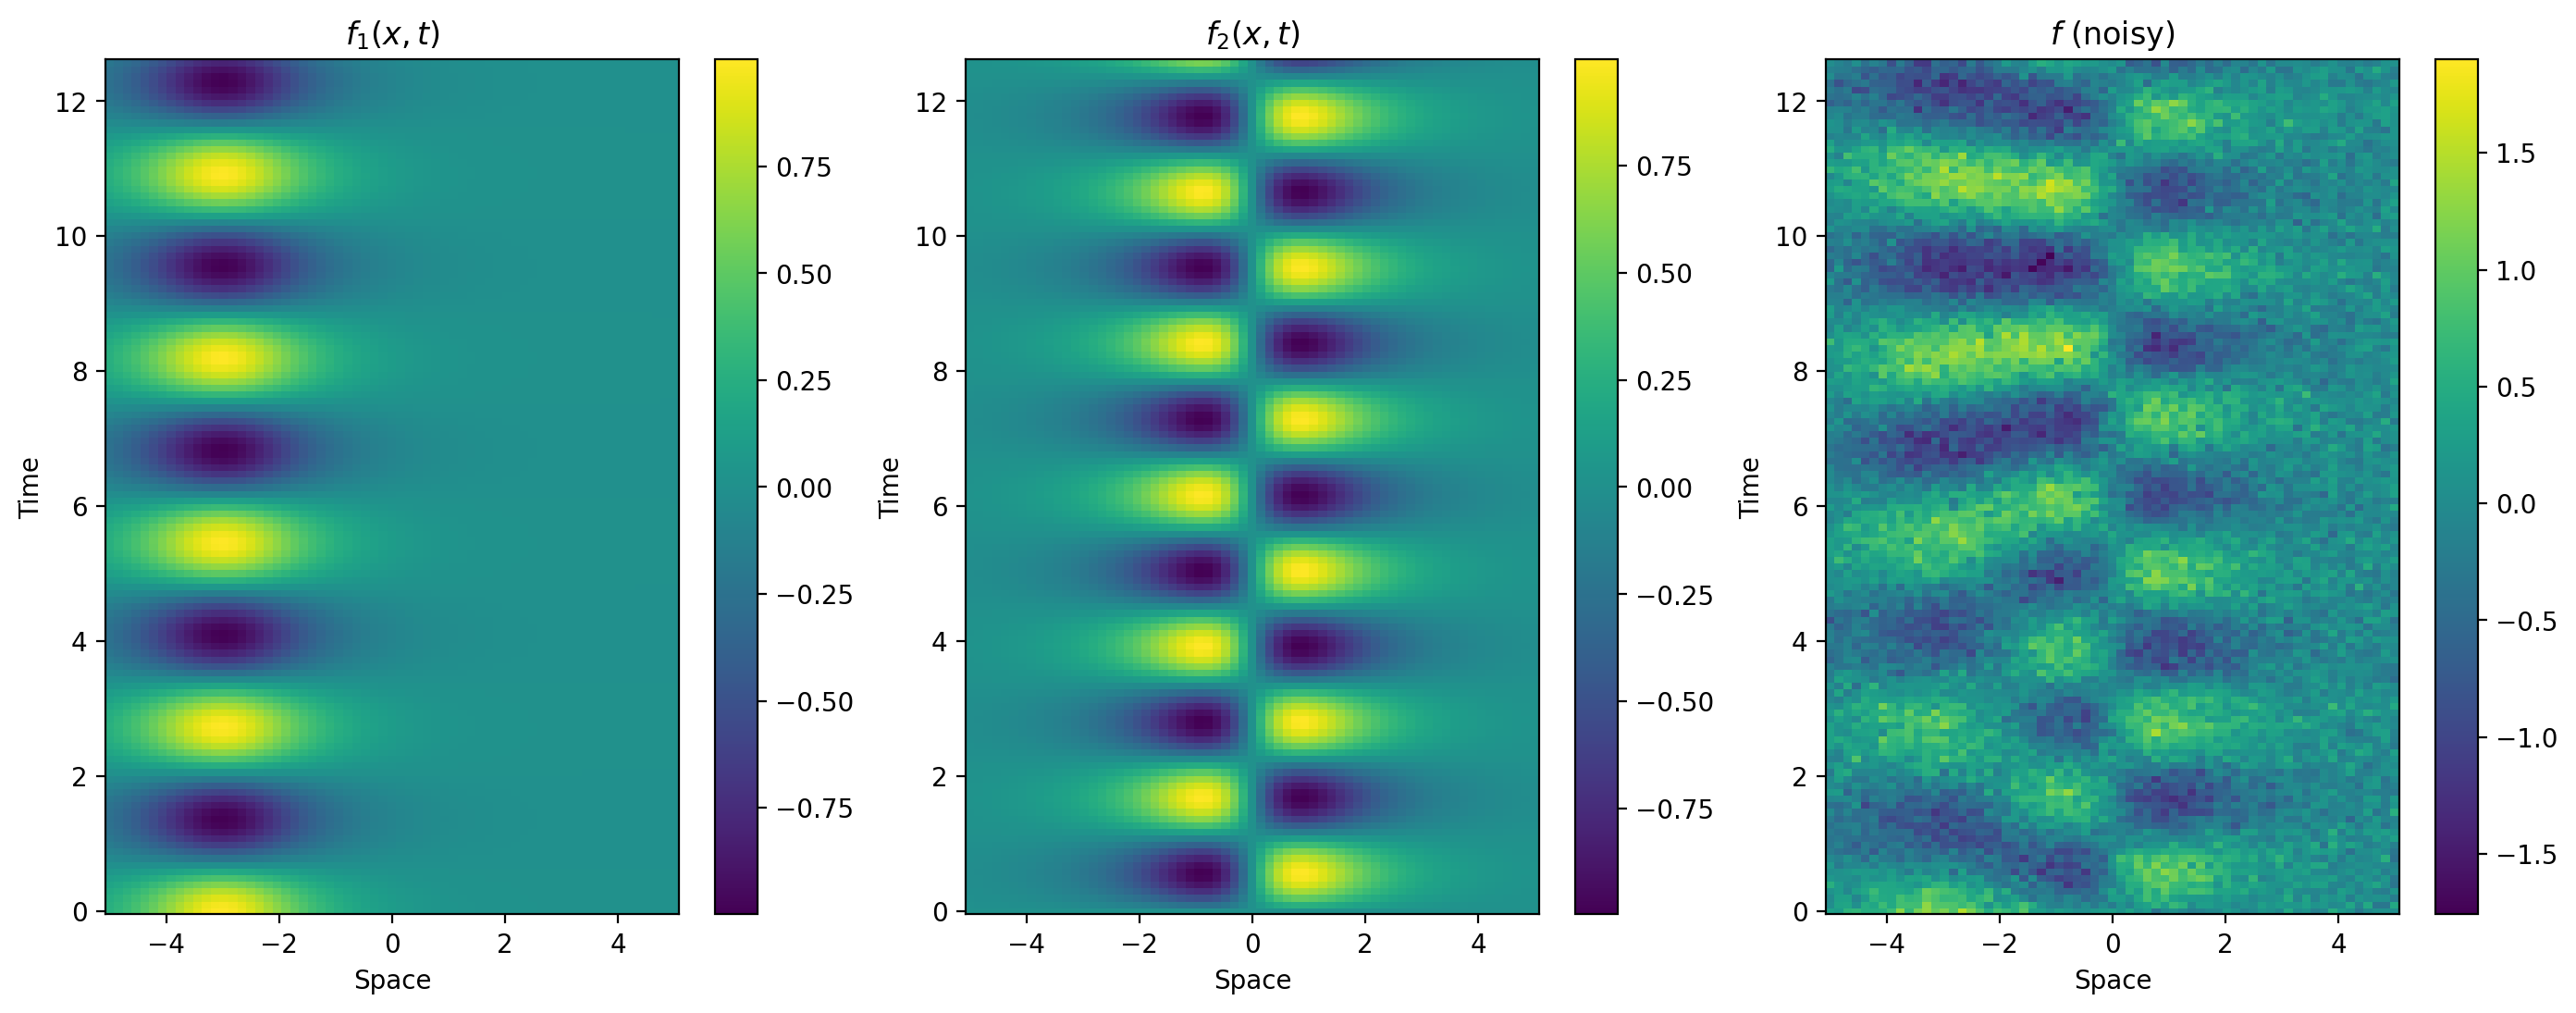

In [14]:
titles = ["$f_1(x,t)$", "$f_2(x,t)$", "$f$ (noisy)"]
data = [X1, X2, Xn]

fig = plt.figure(figsize=(17, 6), dpi=200)
for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
    plt.xlabel("Space")
    plt.ylabel("Time")
    plt.colorbar()
plt.show()

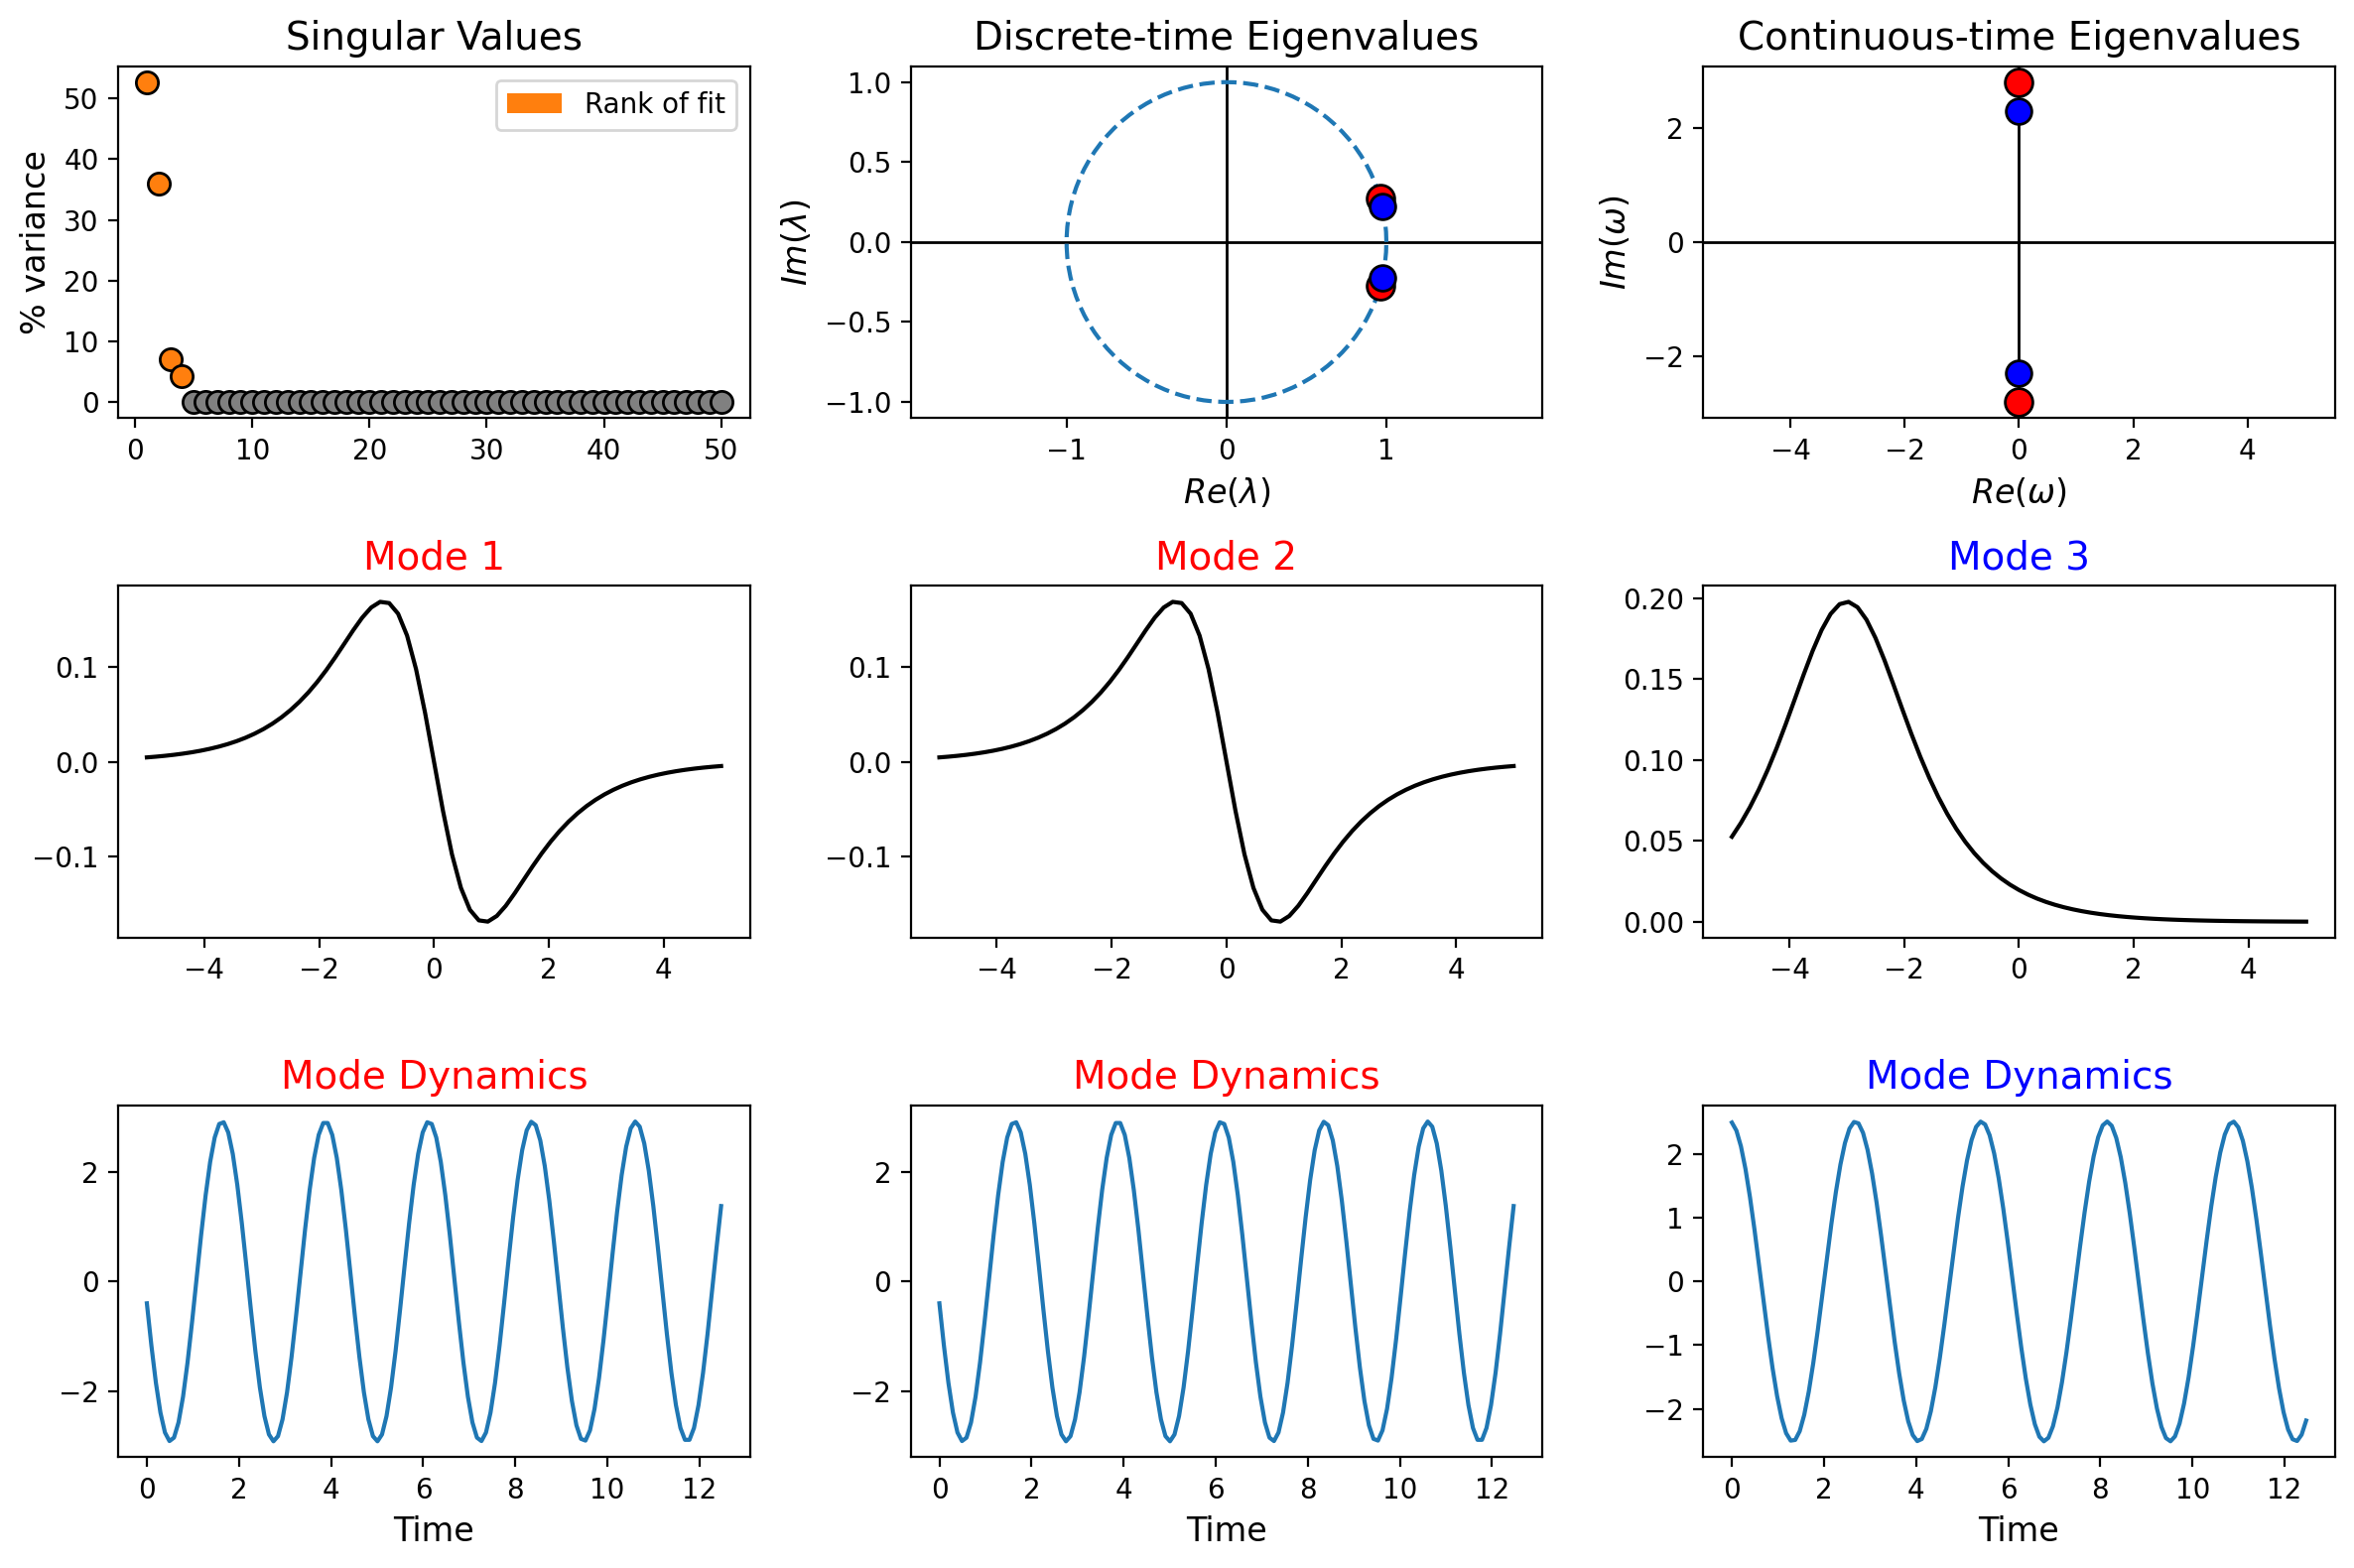

Frequencies (imaginary component): [-0.+2.8j -0.-2.8j  0.+2.3j  0.-2.3j]


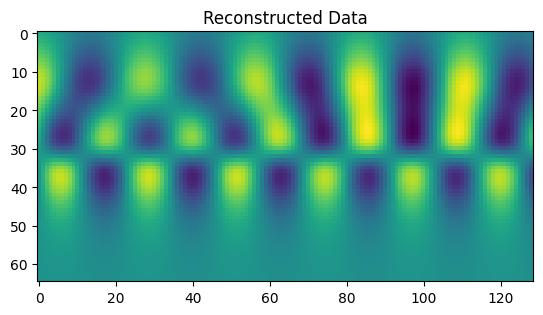

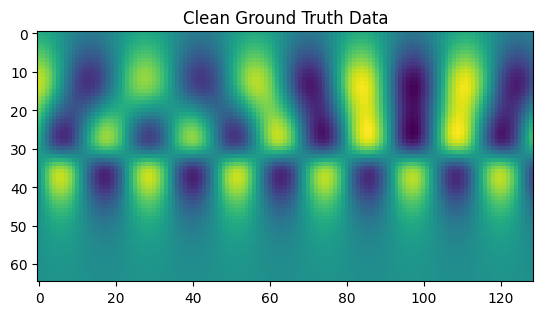

In [15]:
d = 2  # we will use this number of delays throughout the tutorial
dmd = DMD(svd_rank=4)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(X.T)
plot_summary(delay_dmd, x=x, t=dt, d=d)
print(
    f"Frequencies (imaginary component): {np.round(np.log(delay_dmd.eigs) / dt, decimals=12)}"
)
plt.title("Reconstructed Data")
plt.imshow(delay_dmd.reconstructed_data.real)
plt.show()
plt.title("Clean Ground Truth Data")
plt.imshow(X.T)
plt.show()

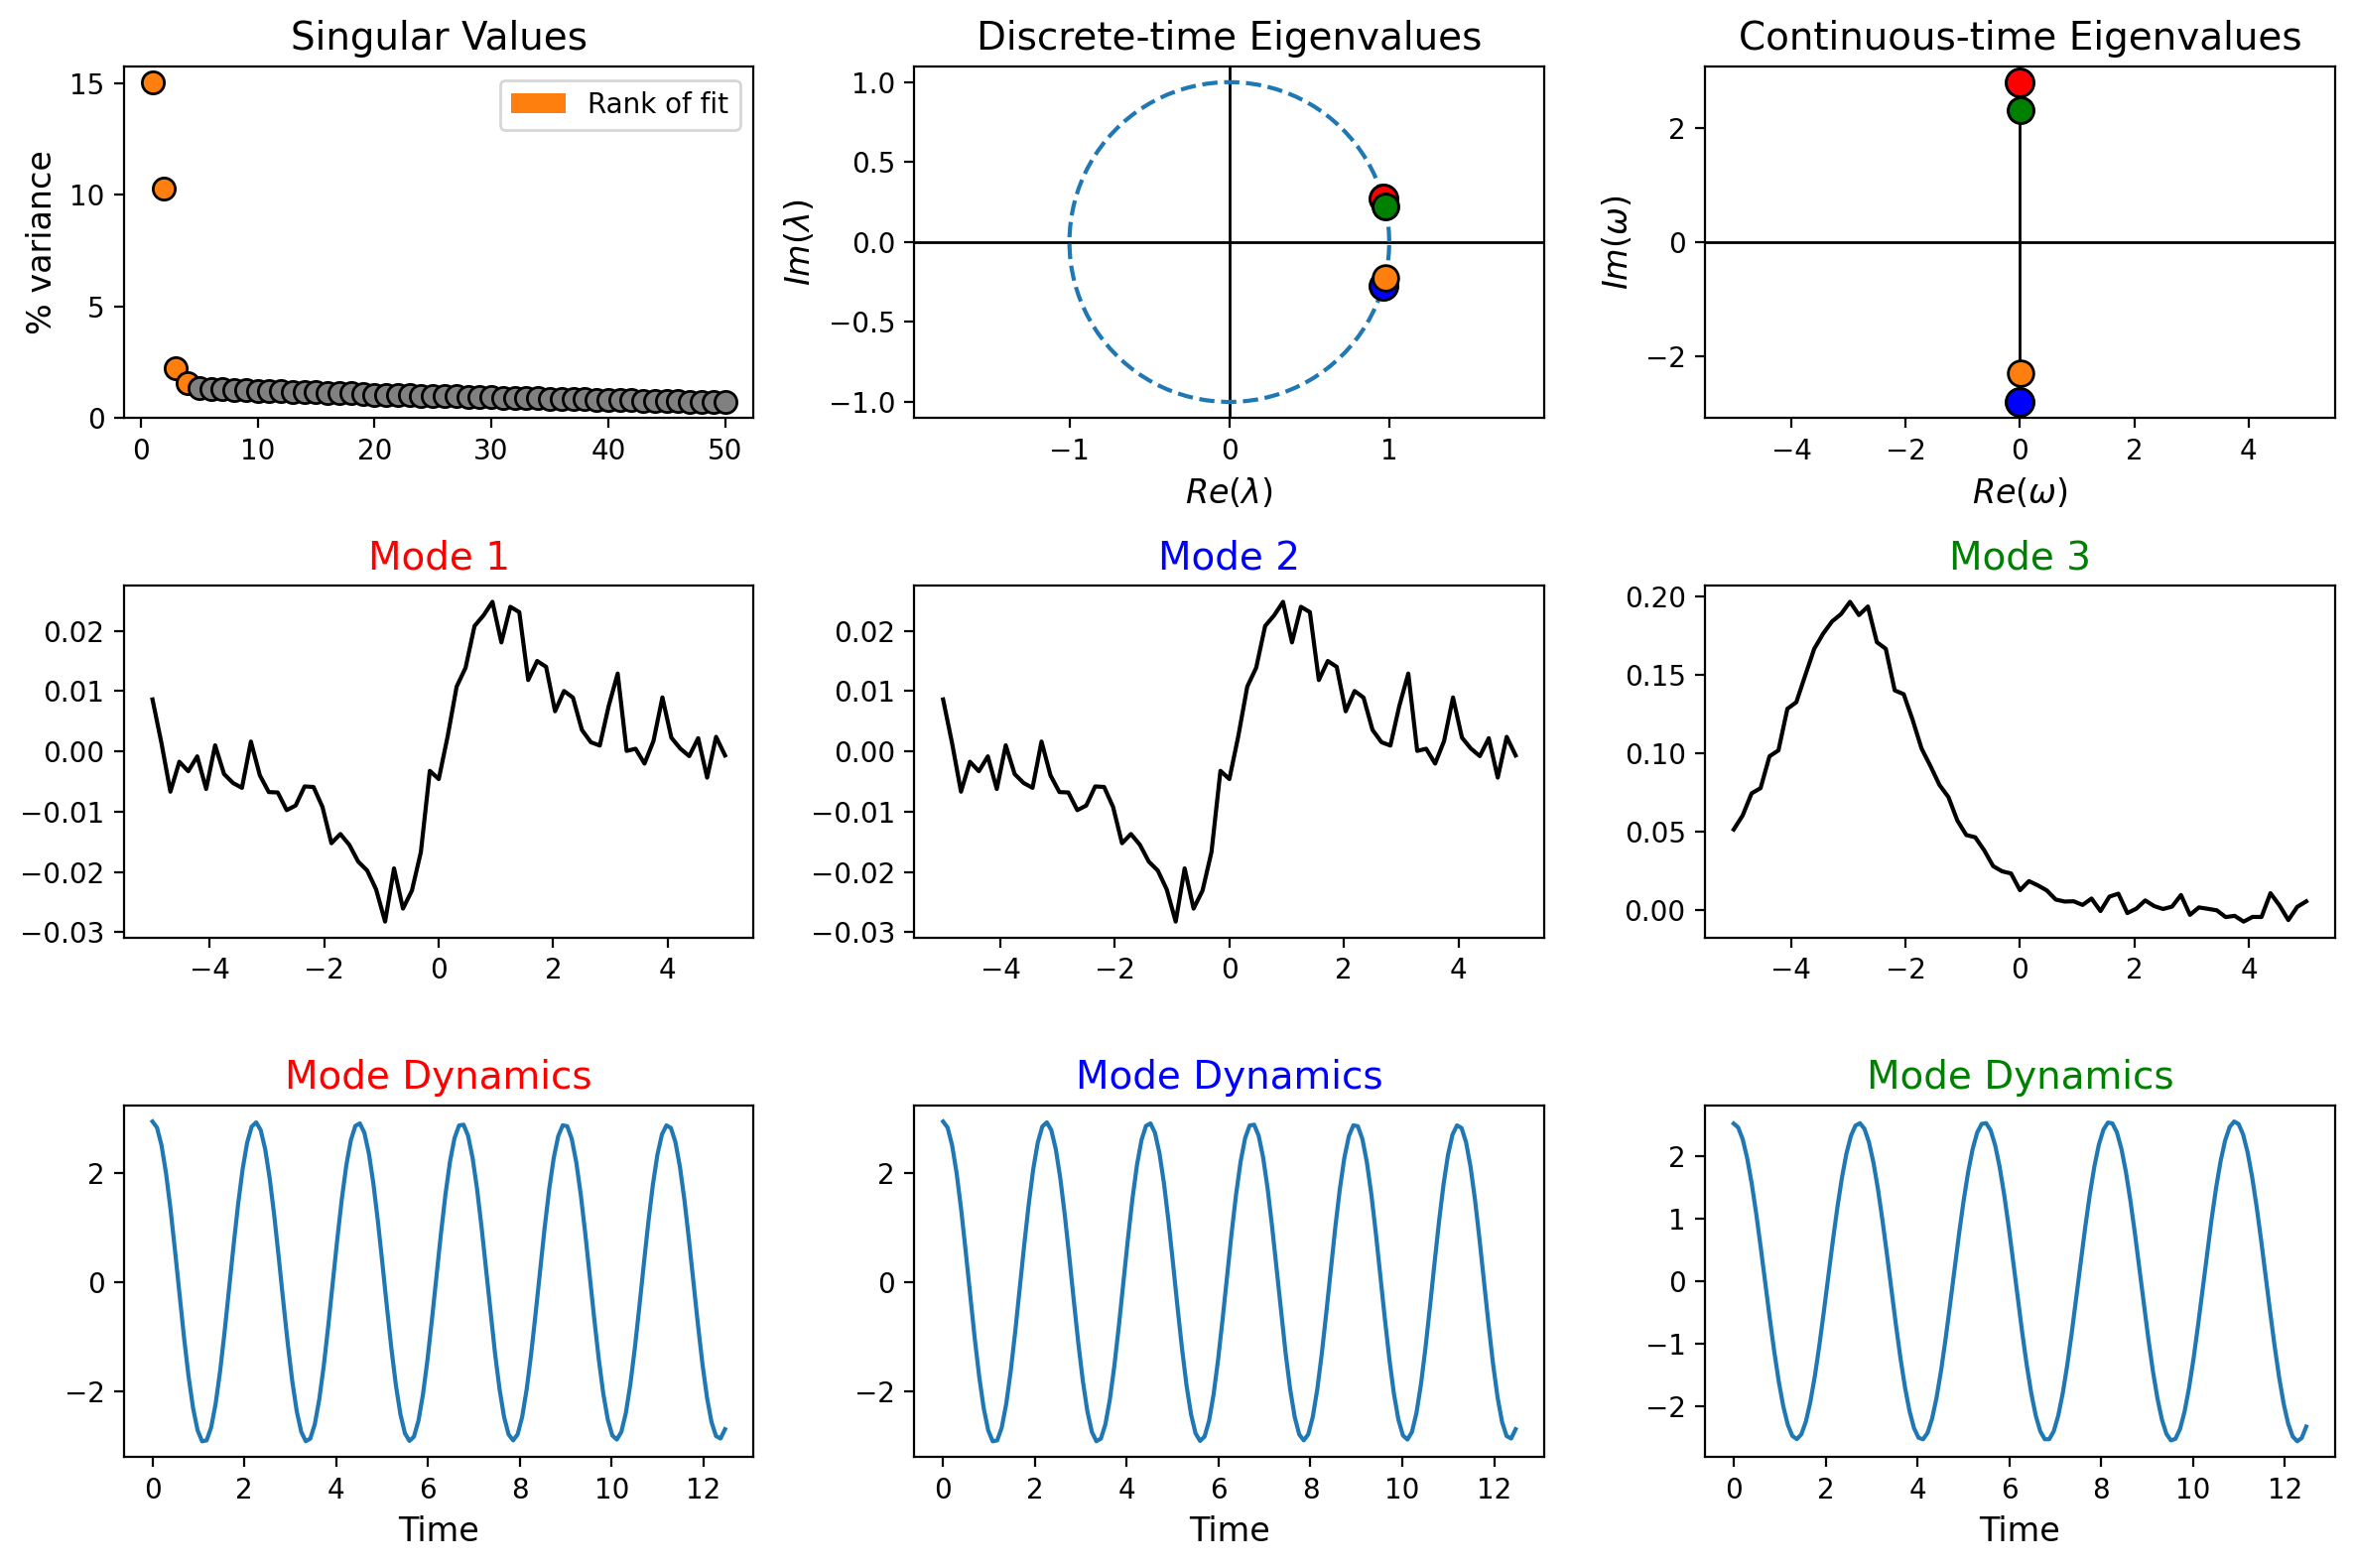

Frequencies (imaginary component): [-0.002+2.8j   -0.002-2.8j    0.001+2.302j  0.001-2.302j]


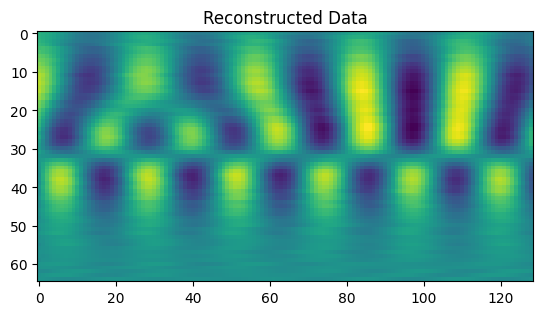

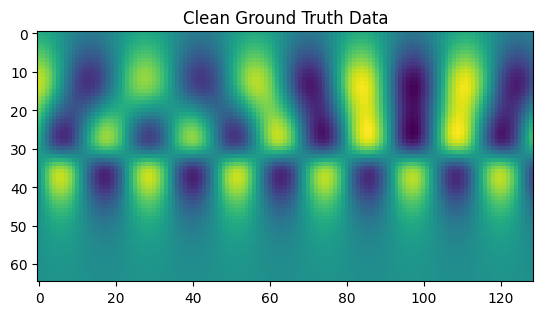

In [16]:
# Build the Optimized DMD model.
# num_trials=0 gives Optimized DMD, without bagging.
optdmd = BOPDMD(svd_rank=4, num_trials=0)

# Wrap the model with the preprocessing routine.
delay_optdmd = hankel_preprocessing(optdmd, d=d)

# Fit the model to the noisy data.
# Note: BOPDMD models need the data X and the times of data collection t for fitting.
# Hence if we apply time-delay, we must adjust the length of our time vector accordingly.
delay_t = t[: -d + 1]
delay_optdmd.fit(Xn.T, t=delay_t)

# Plot a summary of the DMD results.
plot_summary(delay_optdmd, x=x, d=d)

# Print computed eigenvalues (frequencies are given by imaginary components).
# Also plot the resulting data reconstruction.
print(
    f"Frequencies (imaginary component): {np.round(delay_optdmd.eigs, decimals=3)}"
)
plt.title("Reconstructed Data")
plt.imshow(delay_optdmd.reconstructed_data.real)
plt.show()
plt.title("Clean Ground Truth Data")
plt.imshow(X.T)
plt.show()